<a href="https://colab.research.google.com/github/rafaelfabri/Data-Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# **Analisando a Violência no Rio de Janeiro**







# **1. Introdução**

![alt text](https://wallpaperaccess.com/full/125819.jpg)

A região do Rio de Janeiro foi encontrada durante o ano de 1502, em uma expedição Portuguesa. Porém na verdade os primeiros a chegarem na região foram os Franceses, e assim estes batalharam pela região, no ano de 1567 os Franceses foram expulsos da cidade, sendo assim colonizada pelo os Portugueses. 

A cidade do Rio de Janeiro possuía muitas vantagens, uma dessas é a Baía de Guanabara, assim houve o surgimento de uma zona portuária, com intuíto de abrir um área comercial na região, ali era comercializado peixes, madeira e cana de acuçar, a partir deste momento a população começou a crescer, chegando atualemente em 6,32 milhões de habitantes. [(Thais Pacievitch)](https://www.infoescola.com/rio-de-janeiro/historia-do-rio-de-janeiro/)

# **Sumário**

* 1. Introdução 


* 2. Obtenção dos dados
  * 2.1 Importando dados


* 3. Análise inicial de dados 
  * 3.1 Quantidade de linhas e colunas
  * 3.2 Nomes de cada coluna/variável
  * 3.3 Cinco primeira linhas 
  * 3.4 Porcentagem de dados ausentes


* 4. Informações Estatísticas da Violência no Rio de Janeiro
  * 4.1 Descrição estatitística de cada variável
  * 4.2 Verificação de pontos discrepantes (BoxPlot)
  * 4.3 Análises sobre os veículos (furto, roubo e recuperado)
  * 4.4 Algumas informações sobre homicídio doloso
    * 4.4.1  Visualização de Dados
  * 4.5 Gráfico de dispersão para roubo em coletivo

  
* 5. Conclusão

## **2. Obtenção dos Dados**

Os dados foram coletados do site oficial do Governo do estado do Rio de Janeiro. 

O site foi o ISPDados - Dados Abertos do Instituto de Segurança Pública.

Nele contém todas informações e registro criminais e das atividades da polícia do estado do Rio de Janeiro.

A partir deste dados será estudado se existem outliers (pontos discrepantes), dados ausentes, ou algum outro problema com o Data set.

Poderam ser avaliados possíveis épocas de maior indice de criminalidade,correlações entre váriaveis, informações estatísticas, histogramas e entre outras possibilidades, e tirados alguns insight deste data set.  


O conjunto de dados foram retirados do site [inspdados.](http://www.ispdados.rj.gov.br/estatistica.html)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **2.1 Importando os dado**s

Os dados serão importados na célula abaixo, a partir de uma função da bilblioteca Pandas. 

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv", index_col='vano')

Abaixo foi importado mais um vez o mesmo conjunto de dados, porém desta vez a coluna que contém as datas não serão índices, isso foi feito pois para que seja mais fácil a plotagem de um gráfico a seguir neste projeto.

In [0]:
df_sub = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

Aqui foi feita outra cópia do primeiro data set.

In [0]:
df_scatter = df.copy()

# **3. Análise Inicial dos Dados**

Neste tópico será realizada uma análise exploratória de dados, com intuito de uma melhor interpretação e entendimento do data set.

Serão verificados:

* 3.1 - Quantidade de linhas e colunas
* 3.2 - Nomes de cada coluna/variável e os tipo de de cada variável
* 3.3 - A visualização das 5 primeiras linhas e 5 últimas linhas
* 3.4 - Porcentegam de dados ausentes

### **3.1 Quantidade de linhas e colunas**

Abaixo é apresentado as informações complementares sobre o data set (conjunto de dados).

In [0]:
print('linhas', df.shape[0], '\ncolunas', df.shape[1])

linhas 344 
colunas 55


In [0]:
print('o data set possui', df.shape[0], 'entradas')
print('o data set possui', df.shape[1], 'variáveis')


o data set possui 344 entradas
o data set possui 55 variáveis


### **3.2 Nomes de cada coluna/variável**

Todos as colunas presentes no data set.

In [0]:
display(df.dtypes)

mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transeunte                int64
furto_coleti

Este data set apresenta dois tipos de variáveis:

* int - valores numéricos inteiros
* float - valores numéricos decimais 

São um total de 55 variáveis, dentre as principais variáveis estudas neste projeto encontra-se abaixo, acompanhada com sua devida explicação da mesma: 

* roubo_veiculo:  roubos totais de veículos registrado em um mês


* roubo_em_coletivo: roubos totais em coletivo registrado em um mês                  

* total_roubos: somatório de todos os roubos ocorridos no mẽs                  

* recuperacao_veiculos: total de veículos recuperados no respectivo mês 


* hom_doloso: quantidade total de homícedeos dolosos em um mês
        

### **3.3 Cinco primeiras linhas do data set**

As 5 primeiras linhas são mostradas abaixo. Pode-se observar que cada linha de dados é representado por um dos meses do respectivo ano que encontra-se no índice.

In [0]:
df.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


As 5 últimas linhas do data set são mostradas abaixo. 

In [0]:
df.tail()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


### **3.4 Porcentegam de dados ausentes**

A verificação de dados ausentes é muito importante, pois a ausência de dados pode comprometer a qualidade da análise, podendo implicar em hipóteses erradas, logo é bom saber a proporção de dados faltantes em cada variável/coluna.



Dados faltantes são problemas em vários conjuntos de dados.

Existem algumas soluções para resolver este problema.

* Pode ser decidido apagar toda a coluna, pois esta variável não apresenta dados sufucientes para que seja extraído informações consistentes sobre o data set. 

* Outra solução possível é de apagar as linhas onde encontra-se células sem informações, porém está solução é arriscada, pois pode prejudicar a análise se retirado muitas linhas, essa solução pode ser utilizada quando o percentual de dados ausentes em um coluna é bem pequena.

A análise abaixo mostra que muitas váriaveis apresentam dados ausentes.

In [0]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
trafico_drogas                0.523256
cmba                          0.523256
cmp                           0.523256
aaapai                        0.523256
apf                           0.523256
furto_coletivo                0.418605
estupro                       0.418605
extorsao                      0.418605
sequestro_relampago           0.418605
estelionato                   0.418605
roubo_apos_saque              0.418605
furto_celular                 0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
roubo_cx_eletronico           0.418605
roubo_conducao_saque          0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
ameaca                        0.279070
sequestro                     0.279070
lesao_corp_morte         

Abaixo doi verificado quando foi informado no dataset o primeiro dados das variáveis:
* roubo_bicicleta
* furto_bicicleta
* apreensao_drogas_sem_autor

In [0]:
print('Roubo de bicicleta:\t\t', df['roubo_bicicleta'].first_valid_index(), 
      '\nFurto de bicicleta:\t\t', df['furto_bicicleta'].first_valid_index(),
      '\napreensao_drogas_sem_autor:\t', df['apreensao_drogas_sem_autor'].first_valid_index())      

Roubo de bicicleta:		 2014 
Furto de bicicleta:		 2014 
apreensao_drogas_sem_autor:	 2006


De acordo com o resultado para a variável Roubo de bicicleta e Furto de bicicleta, os primeiros dados foram informados no ano de 2014.
Já para variável apreensao_drogas_sem_autor, os dados apereceram a partir do ano de 2006.

Nas 3 células abaixo, forma verificados a quantidade de dados ausentes a partir do ano que se deu início a publicação de dados respectivo de cada uma das 3 variáveis acima.

In [0]:
df.loc['2015':'2019',[ 'roubo_bicicleta' ]].isnull().sum()


roubo_bicicleta    0
dtype: int64

In [0]:
 df.loc['2015':'2019',['furto_bicicleta']].isnull().sum()

furto_bicicleta    0
dtype: int64

In [0]:
 df.loc['2007':'2019',['apreensao_drogas_sem_autor']].isnull().sum()

apreensao_drogas_sem_autor    0
dtype: int64

Pode-se notar que após o primeiro ano onde se deu início a divulgação dos dados, não houve nenhum dado ausente. 

Logo a partir deste resultado é possível a grande ausencia de dados informada acima com roubo_bicicleta com 80.23% e também das outras variáveis, se deve ao fato de que essas colunas só foram exister muito após o ano de 1991, onde se teve o início deste dataset, isso indica que não é uma ausencia de dados por falta de responsibilidade e que poderia prejudicar o dataset, mas sim apenas uma atualização e melhoria das informações.

Assim não é necessário apagar esta coluna ou as linhas que não apresentam dados, apenas deve-se lembrar em caso de análises destas colunas, que o período de início destes não são em 1991.

# **4. Informações Estatísticas da Violência no Rio de Janeiro**

Neste capítulo foi estudada algumas informações e tirados alguns insights e hipóteses do data set. Foram verificados as descrições estatísticas de cada variável, analisados algumas informações sobre roubo, furto e recuperação de veículos, e também algumas informações sobre o total de roubos e furtos.

A partir da introdução serão análisados algumas informações básicas do data set.

### **4.1 Descrição estatitística de cada variável**

Abaixo foi realizada uma média de todos os registros, desde 1991 até 2019.

É bom ressaltar que as informações contidas no data set apresenta longo período de avaliação sendo este de 28 anos, logo existe a possibilidade de que exista diferenças grandes entre as variáveis, pois em um período longo pode haver grandes mudanças na criminalidade da cidade.

Através do que foi discutido acima, foi proposto verificar a existência de Outliers, mas foi relizada minuciosamente. 

A descrição dos dados abaixo são de 28 anos, com o objetivo de apenas mostrar informações sobre data set como um todo.

In [0]:
df.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000

Foi realizado uma comparação entre a média e a mediana, pois casos essas duas variáveis estajam bem distantes existe a possibilidade de um índicio de Outliers (dados discrepantes).

Porém é dificultoso procurar em 55 variáveis a diferença entre média e mediana, e as vezes algum dado pode passar despercebido, por isso abaixo foi plotado um gráfico de boxplot com as variáveis que serão estudadas neste relatório, para uma verificação mais precisa.

### **4.2 Verificação de pontos discrepantes (BoxPlot)**

Serão plotados os gráficos boxplot das variáveis que foram estudas neste projeto, mais algumas escolhidas aleatóriamente.

**Outliers - dados atípicos**

Outliers são dados discrepantes em relação ao conjunto de dados coletados, estes atrapalham a análise e distorcem resultados.

Para um melhor entendimento, imagine que uma pessoa está se pesando, e para um resultado preciso, esta se pesa 10 vezes, com o objetivo de coletar uma média de seu peso. Em nove pesagens, os resultados da balança foram de aproximadamente 60 kg, porém na décima pesagem o resultado foi 80 kg, alguma coisa está errada, não concorda?

Logo, muito provavelmente ocorreu algum problema com a balança ou um problema externo relacionado ao ambiente, mas se este dado for incluído na avaliação da média da massa corporal da pessoa, o valor obtido estará um pouco discrepante, mostrando um resultado menos realista.

**Gráficos boxplot**

Neste momento será realizada análises através de um gráfico boxplot.

A partir de um gráfico boxplot é possível verificar a mediana, e onde provavelmente estará em relação aos limites, também é possível ver os quartis e alguns limites. Pontos fora destes limites podem ser considerados como dados discrepantes.

![alt text](http://www.leg.ufpr.br/~silvia/CE701/img445.png)

Foi realizado dois gráficos boxplot, com o intuito de verificar através de uma análise gráfica a distância de alguns valores em relação a média.

Abaixo encontra-se os 3 primeiros gráficos boxplot.

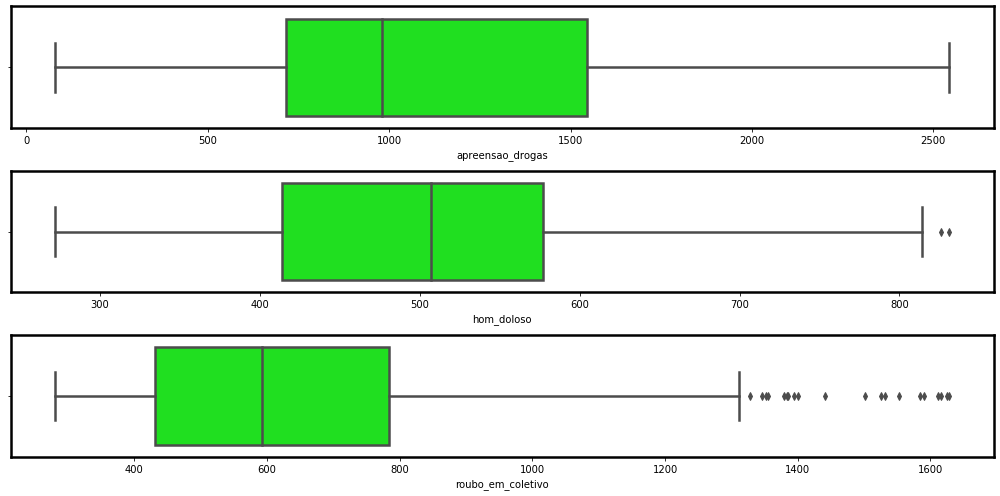

In [0]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(14,7))

sns.boxplot(x=df['apreensao_drogas'], data=df, ax=ax[0], color='#00FF00', linewidth=2.5)
sns.boxplot(x='hom_doloso', data=df, ax=ax[1], color='#00FF00', linewidth=2.5)
sns.boxplot(x='roubo_em_coletivo', data=df, ax=ax[2], color='#00FF00', linewidth=2.5)

for axis in ['top', 'bottom', 'right', 'left']:
    for i in range(0,3,1):
        ax[i].spines[axis].set_linewidth(2.5)

fig.tight_layout();

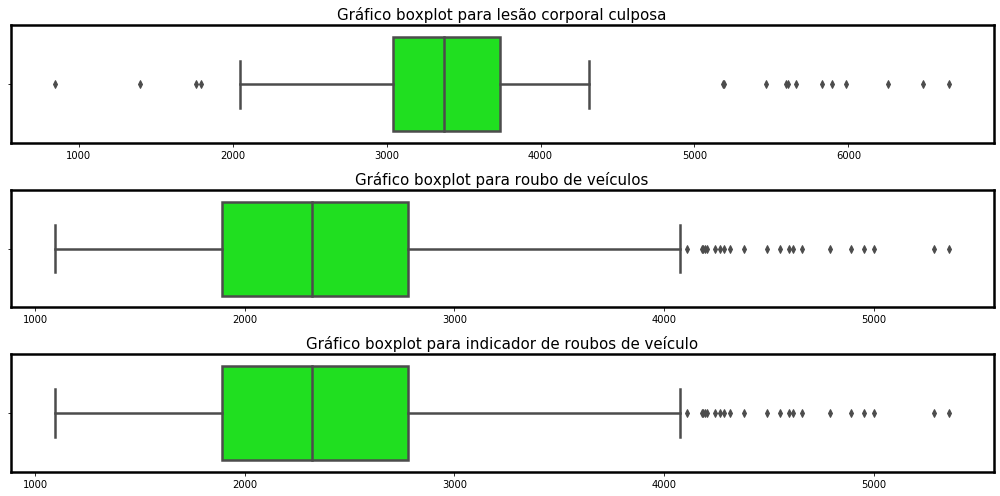

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14,7))

sns.boxplot(x=df['lesao_corp_culposa'],data=df, ax=ax[0], color='#00FF00', linewidth=2.5)
sns.boxplot(x=df['roubo_veiculo'],data=df, ax=ax[1], color='#00FF00', linewidth=2.5)
sns.boxplot(x=df['indicador_roubo_veic'],data=df, ax=ax[2], color='#00FF00', linewidth=2.5)

ax[0].set_title("Gráfico boxplot para lesão corporal culposa", fontsize=15)
ax[0].set_xlabel("")
ax[1].set_title("Gráfico boxplot para roubo de veículos", fontsize=15)
ax[1].set_xlabel("")
ax[2].set_title("Gráfico boxplot para indicador de roubos de veículo", fontsize=15)
ax[2].set_xlabel("")

for axis in ['top', 'bottom', 'left', 'right']:
  for i in range(0,3,1):
      ax[i].spines[axis].set_linewidth(2.5)

fig.tight_layout()

Observa-se a existência de vários pontos fora dos limites nos boxplots acima, mostrando que esses são outliers (pontos discrepantes), porém como dito anteriormente estes dados correspondem a 28 anos de informações, e muita coisa pode acontecer e influenciar o conjunto de dados nesse tempo.

Para verificar com maior detalhes a razão de ter ocorrido estes pontos fora dos limites, foi realizado adiante um gráfico da média de cada ano de roubo_veiculo, total_roubo. E a partir destas duas variáveis foi inferido que todos esses dados não podem se considerados outliers, adiante será explicado com mais detalhes.

#### **4.2.1 Análise das médias de roubos de veículo e roubos totais por ano**

No código abaixo foi calculado a média de cada ano para cada variável, assim esta irá se tornar uma variável tipo lista que contém 28 médias, respectiva para cada ano.

In [0]:
#Média de roubo de carro de cada ano 
mean_roubo_c = []
mean_lesao_corp = list()
mean_indicador_roubo = list()
mean_total_roubo = list()
for i in range(1991, 2020, 1):
  mean_roubo_c.append( df.loc[str(i),'roubo_veiculo'].mean() )
  mean_indicador_roubo.append( df.loc[str(i),'indicador_roubo_veic'].mean() )
  mean_total_roubo.append( df.loc[str(i),'total_roubos'].mean() )


Código abaixo foi realizado para que a variável anos seja incluída no eixo x dos gráficos a seguir.

In [0]:
anos=list()
for i in range(1991,2020,1):
           anos.append(str(i))

Vale ressaltar que foi observado que mean_roubo_c e mean_indicador_roubo são iguais, por isso não foi plotado um gráfico para este.

Já a variável lesao_corp_culp não foi estudada, a partir do resultado de roubo de veículos será concluído o mesmo para lesão corporl culposa.

In [0]:
mean_roubo_c == mean_indicador_roubo

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Abaixo foi relizado um gráfico de barras para as três variáveis, deve-se ter atenção, pois os gráficos estão em proporções diferentes.

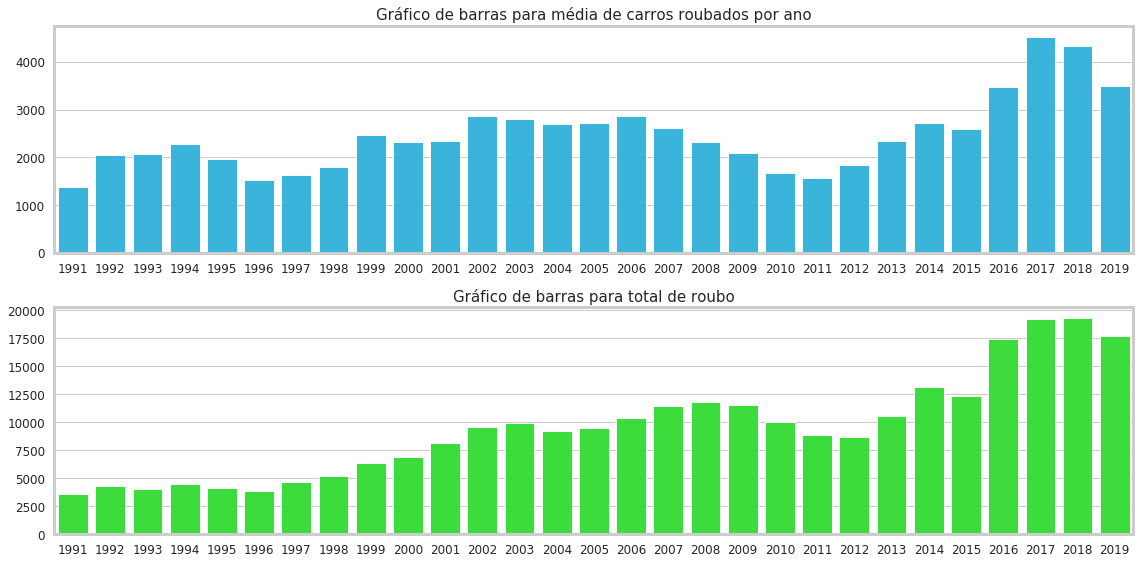

In [0]:
#estilo do gráfico
sns.set(style='whitegrid')

#criando subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(16,8))

#plotando os gráficos
sns.barplot(x=anos, y=mean_roubo_c, ax=ax[0], color='#00BFFF', alpha=0.9, saturation=0.7)     #palette="Reds_d
sns.barplot(x=anos, y=mean_total_roubo, ax=ax[1], color='#00FF00', alpha=0.9, saturation=0.7)


#configurações 
ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)

ax[0].set_title('Gráfico de barras para média de carros roubados por ano', fontsize=15)
ax[1].set_title('Gráfico de barras para total de roubo', fontsize=15)

for axis in ['right', 'bottom', 'left', 'top']:
  for i in range(0,2):
    ax[i].spines[axis].set_linewidth(3)
                                 
fig.tight_layout();

Nota-se que existem semelhanças entres os gráficos de barras.

O gráfico total de roubo, mostra o total médio de roubo que ocorreram em determinado ano. 

Deve-se atentar que à algumas situações, pode ser que em um exato ano houve um aumento de roubo de veículos, porém outros tipos de roubos diminuíram, logo não haverá o aumento da quantidade de roubos totais neste respectivo ano. Contudo se verificado nos gráficos, percebe-se que essa situação não ocorre, e se ocorrer a dimunuição dos roubos totais é muito baixa.

Se observado com atenção entre o ano de 1997 e 2003, pode-se notar que houve um aumento progressivo em cada ano nos dois gráficos, em 2010 e 2011 houve uma redução das barras dos dois gráficos. Já para o ano de 2016 à 2018, teve uma grande elevação dos roubos nos dois gráficos. 

O padrão dos dois gráficos não é identico, porém em bastantes intervalos ele se comporta de maneira semelhante, quando há um aumento no roubo de carros existe um aumento no roubos totais e quando há uma diminuição nos roubos totais há uma diminuição nos roubos totais.

A partir disto pode ser tirado algumas hipótses básicas. 

* Os roubos de carro tem uma grande influência nos roubos totais de da cidade do Rio de Janeiro;
* Existe uma similaridade entre as variáveis, o que mostra que o data set apresenta um bom conjunto de dados sem informações distorcidas ou erradas. 

Claramente é necessário uma análise mais completa para afirmar isto com certeza, porém para o estudo deste projeto essas hipóteses são confiáveis.

Logo a partir destas avaliações é possível afirmar que os pontos discrepantes resultantes no boxplot de roubos_veículos na verdade não podem ser considerados Outliers.

Aqueles pontos fora dos limites ocorreram porque está variável apresenta informações de um tempo total de 28 anos, logo não pode-se dizer que o grande aumento dos roubos de 2017 e 2018 são falsos, eles são reais, e devem ser análisados, não podendo retira-los.

Contudo em caso de um projeto futuro, onde seja feita uma análise mais rigorasa, ou utilizada um modelo de machine learning, ou deep learling, deve-se atentar para que não seja realizada uma análise completa em cima de todos os 28 anos, mas se deve separar este perído em intervalos de alguns anos, exemplo 4 blocos de 6 anos cada, isso deve ser feito pela razão de estar sendo avaliado um longo período de tempo.

### **4.3 Análises sobre os veículos (furto, roubo e recuperado)**

As vezes não sabemos a diferença entre furto e roubo, abaixo é citada esta diferença.

O furto possui como característica de não haver um episódio de violência, luta, agressão e entre outras. Já o roubo ocorre algum tipo de violência.[(AVIZ. R)](https://www.diferenca.com/furto-e-roubo/)

Abaixo estão as médias de roubo_veiculo, furto_veiculos, recuperacao_veiculos.



In [0]:
print('média do roubos de veículos\t', round(df['roubo_veiculo'].mean(),3), '\nmédia do furto de veículos\t', round(df['furto_veiculos'].mean(), 3), 
      '\nmédia de recuperação de veículos', round(df['recuperacao_veiculos'].mean(), 3) )

média do roubos de veículos	 2448.698 
média do furto de veículos	 1674.672 
média de recuperação de veículos 1772.238


De acordo com o resultado acima as médias são:
* média do roubos de veículos	= 2448.698 
* média do furto de veículos	= 1674.672 
* média de recuperação de veículos = 1772.238

In [0]:
print("percentual de veículos recuperados de roubo e furto no total de todos os anos avaliados = ",
      round(df['recuperacao_veiculos'].sum() / ( df['furto_veiculos'].sum() + df['roubo_veiculo'].sum()),4) )

percentual de veíuculos recuperados de roubo e furto no total de todos os anos avaliados =  0.4298


Os resultados mostrados acima são a respeito de todos os anos de 1991 até 2019, este resultado é interessante, pois apresenta o percentual de veículos recuperados em 28 anos. 

Porém seria mais interessante olhar de uma maneira mais pontual para o percentual de carros recuperados a cada ano, para assim poder ser realizado uma melhor conclusão dos dados. A partir disto foi realizado um gráfico de barras, que será mostrado adiante.

Abaixo utilizado uma estrutura de repetição **for** para que seja atribuído a variável quant as médias de cada ano.

In [0]:
quant=list()
for i in range(1991,2020,1):
          quant.append((df.loc[str(i),'recuperacao_veiculos']/ ( (df.loc[[str(i)],'furto_veiculos']) + (df.loc[[str(i)],'roubo_veiculo']) )).mean())

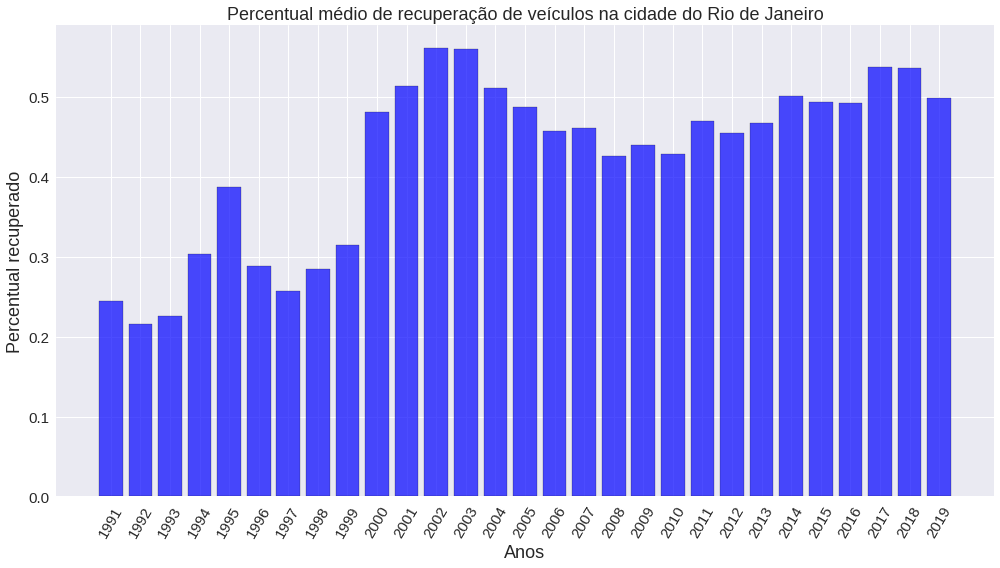

In [0]:
fig, ax = plt.subplots(figsize=(14,8))

plt.style.use('seaborn')
ax.bar(x=anos ,height=quant, color='blue', edgecolor='black', alpha=0.7)

#título
ax.set_title('Percentual médio de recuperação de veículos na cidade do Rio de Janeiro', fontsize=18)

#configurações 
ax.set_xlabel('Anos', fontsize=18)
ax.set_ylabel('Percentual recuperado', fontsize=18)
ax.set_xticklabels(anos)
ax.tick_params(axis='x',rotation=60, labelsize=15)
ax.tick_params(axis='y', labelsize=15 )

fig.tight_layout();

Através do gráfico de percentual médio de recuperação de veículos, nota-se algumas informações importantes que podem ser retiradas deste.

Entre o ano de 1991 e 2009 é possível observar que a recuperação de carro de cada ano nunca foi maiores que 40%, mostrando alguma ineficácia no sistema de investigação da cidade de Rio de Janeiro.

Porém a partir do ano 2000, este percentual apresentou sempre valores maior que 40%, mostrando haver alguma melhora em algum sistema de investigação, talvez a tecnologia ou algum treinamento diferente.

O maior percentual de recuperação de carro foi no ano de 2002 e 2003, sendo aproximadamente 56%. 

Vale também ressaltar que mesmo com uma pequena melhoria na recuperação de veículos a partir do ano 2000, nunca foi recuperado mais de 60% dos veículos roubados e furtados do Rio de Janeiro, isso mostra que infelismente a partir do ano de 2000 o sistema de investigação do Rio de Janeiro esteve estagnado oscilando entre 42% e 56%.

### **4.4 Algumas informações sobre homicídio doloso**

Abaixo está mais algumas informações sobre o máximo e mínimo de homícideos dolosos no estado do Rio de Janeiro.

In [0]:
df.hom_doloso.max()

831

In [0]:
df.hom_doloso.min()

272

#### **4.4.1 Visualização de Dados**

Neste capítulo foi plotado o histograma de uma das variáveis do data set, assim para verificar como é a distribuição desta variável.


Abaixo é realizado o gráfico de histograma da variável homícideos dolosos.

Isto foi realizado com intuito de saber o tipo de distribuição de uma variável, o que é muito importante, pois sabendo como é a distribuição desta é possível realizar uma análise corretamente sobre os dataset.

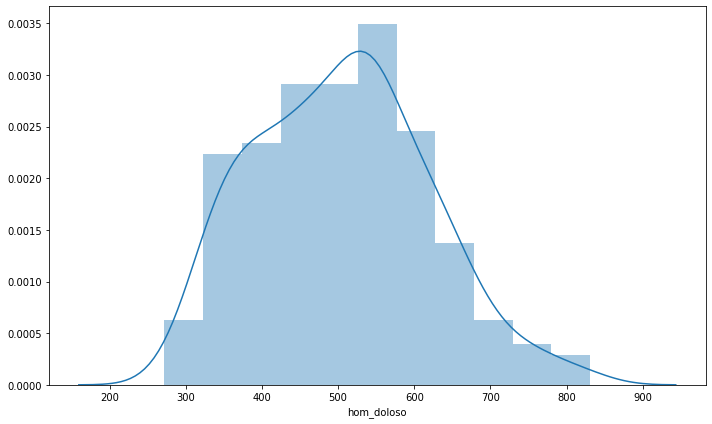

In [0]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(a=df['hom_doloso'], bins=11, ax=ax)

fig.tight_layout();

O gráfico elaborado possuí 11 bins, que são 11 caixas que são divididas os valores, para que assim possa ser contada a frequência com estes aparecem.

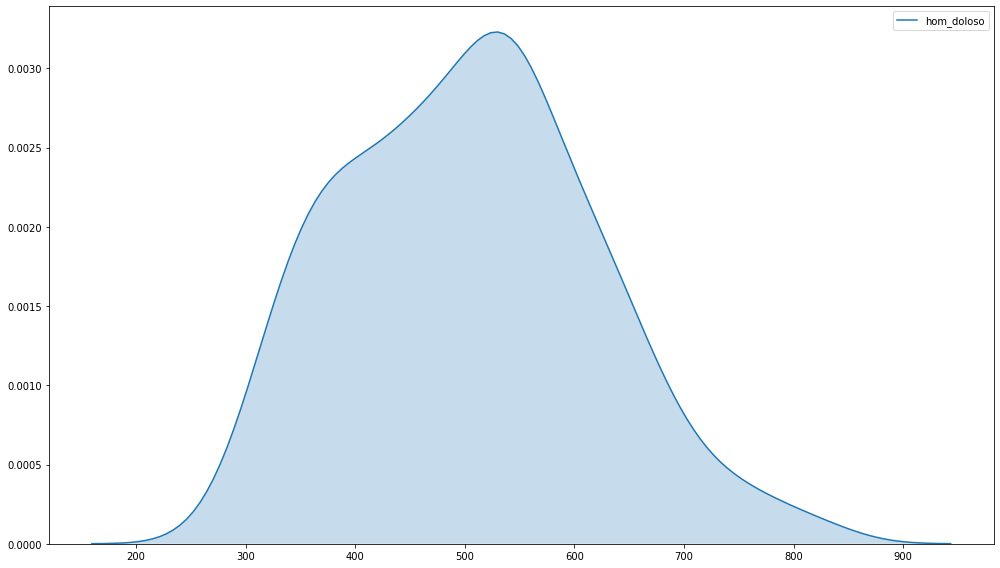

In [0]:
fig, ax = plt.subplots(figsize=(14,8))

sns.kdeplot(data=df['hom_doloso'], ax=ax, shade=True)

fig.tight_layout();

Este gráfico é o mesmo que o anterior, porém este não apresenta as caixas.

Através dos gráficos é possível notar que a variável homícideos dolosos possuí uma distribuição muito semelhante a uma normal, pode ser comparada com a imagem abaixo.

![alt text](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG)

### **4.5 Gráfico de dispersão para roubo em coletivo**



Foi plotado abaixo um gráfico de dispersão, cada ponto representa quantidade roubo coletivo em um deterimanado ano. 

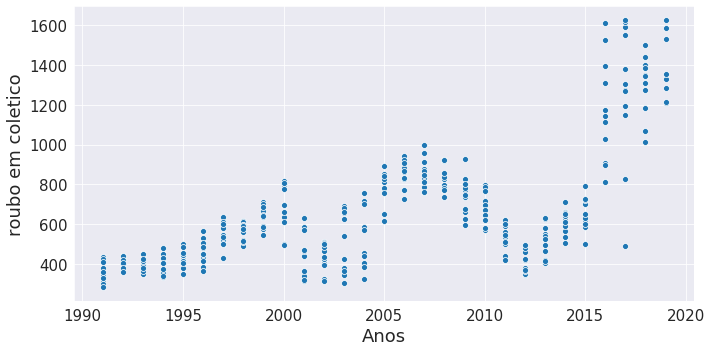

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("darkgrid")

sns.scatterplot(x='vano', y='roubo_em_coletivo',ax=ax, data=df_sub)
ax.set_xlabel('Anos', fontsize=18)
ax.set_ylabel('roubo em coletico', fontsize=18)
ax.tick_params(labelsize=15)




fig.tight_layout();

Existem vários pontos em determinados anos, pois cada ponto representa um dos meses do respectivo ano.

Pode-se notar através do gráfico de dispersão que a partir do ano de 2015, houve um grande aumento em alguns meses no número de roubo em coletivo em média por mês.

Entre o ano de 1991 e 2015 esses roubos oscilaram entre 100 e 1000, porém após 2015, tiveram um pico de acima de 1600 roubos. Também vale comentar que existe um pico de 1000 roubos coletivos em dos meses ano de 2007.  

# 5. Conclusão

Neste projeto foi realizado uma análise pequena em relação ao tamanho do conjunto dados disponíveis, devido a grande quantidade de variáveis este projeto futuramente poderá ser explorado com maior detalhes, porém através deste foi possível tirar algumas hipóteses e insights.

Foi possível verificar a existência de variáveis que tiveram início tardio no data set, o que poderia ser confundido com a ausência de dados. Foram realizados boxplot para verificação de pontos discrepantes, e explicado a razão dos pontos fora dos limites não serem outliers. Além disso teve-se como resultado que seria errado realizar uma análise sobre todo o conjunto, pois as informações do data set são de um período de 28 anos, concluíndo que para uma análise mais rigorasa fosse tomada a decição de separar estes conjuntos. 

Além disto se observado os gráficos de barra de roubos, e também o de dispersão em coletivo, observa-se que a partir do ano de 2016 houve um aumento signifativo em roubos na cidade do Rio de Janeiro.

Este data set da [inspdados.](http://www.ispdados.rj.gov.br/estatistica.html) apresenta varias oportunidades para ser estudado detalhadamente, abrindo portas para um futuro projeto.



